In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df = pd.read_csv("customers.csv")

df["Annual Income (k$)"] = df["Annual Income (k$)"] * 1000

df = df.drop(columns=["CustomerID"])

columns = {"Gender": "Gender", "Age": "Age", "Annual Income (k$)": "Income", "Spending Score (1-100)": "Score"}

df = df.rename(columns=columns)

df["Gender"] = df["Gender"].replace({"Male": 1, "Female": 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  200 non-null    int64
 1   Age     200 non-null    int64
 2   Income  200 non-null    int64
 3   Score   200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Score'}>]], dtype=object)

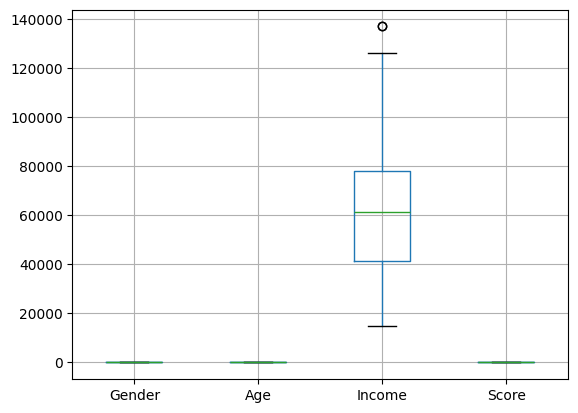

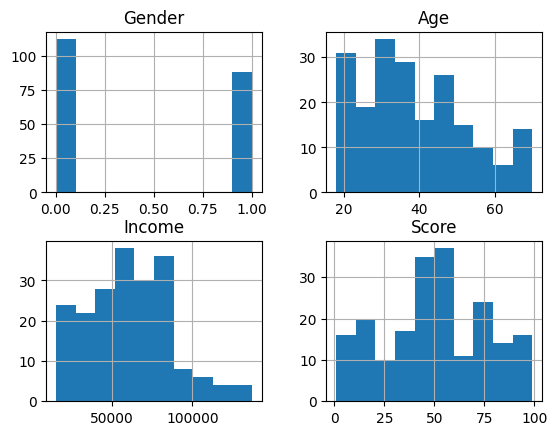

In [3]:
df.boxplot()
df.hist()

In [4]:
scaler = StandardScaler()
x = df.valuesa
x = scaler.fit_transform(x)
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [5]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(x)

    distortions.append(sum(np.min(cdist(x, model.cluster_centers_, "euclidean"), axis=1)) / x.shape[0])

    inertias.append(model.inertia_)

    mapping1[k] = sum(np.min(cdist(x, model.cluster_centers_, "euclidean"), axis=1)) / x.shape[0]

    mapping2[k] = model.inertia_

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.

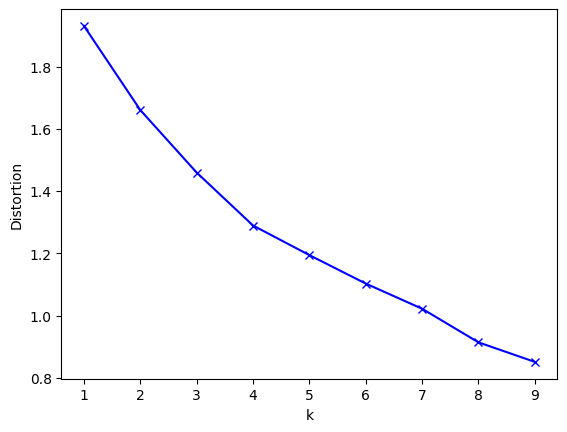

In [6]:
plt.plot(K, distortions, 'bx-')
plt.xlabel("k")
plt.ylabel("Distortion")
plt.show()

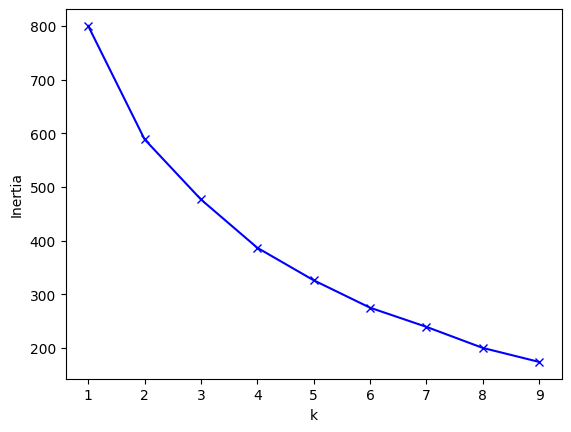

In [7]:
plt.plot(K, inertias, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Score'}>],
       [<Axes: title={'center': 'CustomerType'}>, <Axes: >]], dtype=object)

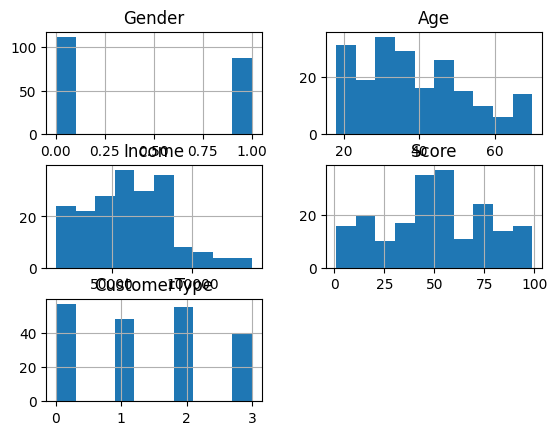

In [8]:
model = KMeans(n_clusters=4, init="k-means++", n_init=12, random_state=4)
customerType = model.fit_predict(x)
df["CustomerType"] = customerType
df.hist()

# Test plot with LinearRegression

In [9]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

def createReg(data):  
    X = data[["Gender", "Age", "Score"]]  # Features
    y = data["Income"]  # Target variable

    reg.fit(X, y)

    return (reg.coef_, reg.intercept_)


In [10]:
scaledData = scaler.fit_transform(df[["Gender", "Age", "Score"]])
dataFrame = pd.DataFrame(scaledData, columns=["Gender", "Age", "Score"])
dataFrame["Income"] = df["Income"]
reg = createReg(dataFrame)

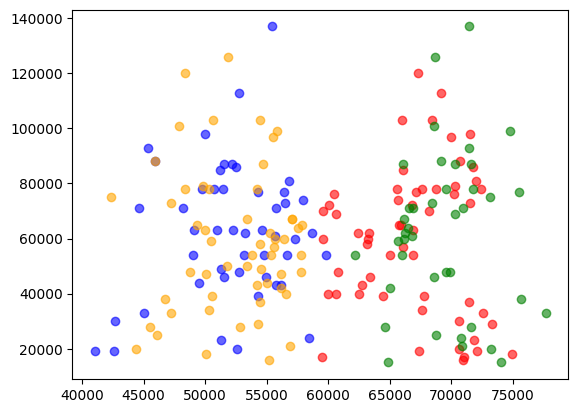

In [11]:
funcX1 = reg[0][0] * df[df["CustomerType"] == 0]["Gender"] + reg[0][1] * df[df["CustomerType"] == 0]["Age"] + reg[0][2] * df[df["CustomerType"] == 0]["Score"] + reg[1]
funcX2 = reg[0][0] * df[df["CustomerType"] == 1]["Gender"] + reg[0][1] * df[df["CustomerType"] == 1]["Age"] + reg[0][2] * df[df["CustomerType"] == 1]["Score"] + reg[1]
funcX3 = reg[0][0] * df[df["CustomerType"] == 2]["Gender"] + reg[0][1] * df[df["CustomerType"] == 2]["Age"] + reg[0][2] * df[df["CustomerType"] == 2]["Score"] + reg[1]
funcX4 = reg[0][0] * df[df["CustomerType"] == 3]["Gender"] + reg[0][1] * df[df["CustomerType"] == 3]["Age"] + reg[0][2] * df[df["CustomerType"] == 3]["Score"] + reg[1]

plt.scatter(funcX1, df[df["CustomerType"] == 0]["Income"], c="red", alpha=0.6)
plt.scatter(funcX2, df[df["CustomerType"] == 1]["Income"], c="blue", alpha=0.6)
plt.scatter(funcX3, df[df["CustomerType"] == 2]["Income"], c="orange", alpha=0.6)
plt.scatter(funcX4, df[df["CustomerType"] == 3]["Income"], c="green", alpha=0.6)
plt.show()

# The result of LinearRegression for plotting
It's not good enough!
....

In [12]:
mean_info_group = df.groupby("CustomerType").mean()

labels = model.labels_

x = df["Age"].values
y = df["Income"].values

mean_info_group

,Gender,Age,Income,Score
CustomerType,,,,
0,0.0,28.438596,59666.666667,67.684211
1,1.0,49.437500,62416.666667,29.208333
2,0.0,48.109091,58818.181818,34.781818
3,1.0,28.250000,62000.000000,71.675000


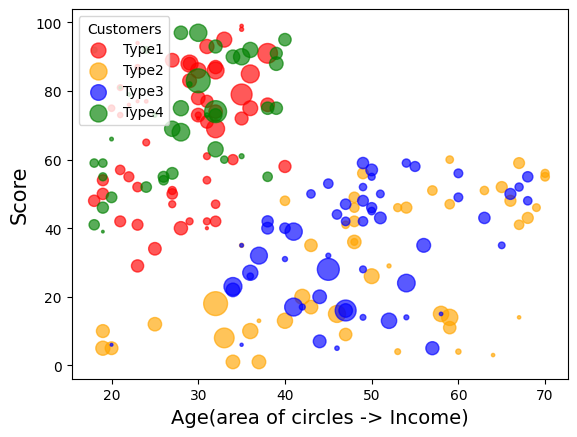

In [13]:
x1 = df[df["CustomerType"] == 0]["Age"].values
y1 = df[df["CustomerType"] == 0]["Score"].values
area1 = (np.pi * (df[df["CustomerType"] == 0]["Income"]) ** 2) / 200000000

x2 = df[df["CustomerType"] == 1]["Age"].values
y2 = df[df["CustomerType"] == 1]["Score"].values
area2 = (np.pi * (df[df["CustomerType"] == 1]["Income"]) ** 2) / 200000000

x3 = df[df["CustomerType"] == 2]["Age"].values
y3 = df[df["CustomerType"] == 2]["Score"].values
area3 = (np.pi * (df[df["CustomerType"] == 2]["Income"]) ** 2) / 200000000

x4 = df[df["CustomerType"] == 3]["Age"].values
y4 = df[df["CustomerType"] == 3]["Score"].values
area4 = (np.pi * (df[df["CustomerType"] == 3]["Income"]) ** 2) / 200000000

plt.scatter(x1, y1, c="red", s=area1, alpha=0.65, label="Type1")
plt.scatter(x2, y2, c="orange", s=area2, alpha=0.65, label="Type2")
plt.scatter(x3, y3, c="blue", s=area3, alpha=0.65, label="Type3")
plt.scatter(x4, y4, c="green", s=area4, alpha=0.65, label="Type4")
plt.xlabel("Age(area of circles -> Income)", fontsize=14)
plt.ylabel("Score", fontsize=15)
plt.legend(loc="upper left", title="Customers")
plt.show()

With a little precision, we can understand the correctness of this clustering, since we have two groups of men and women, we can say that if we look at it from a three-dimensional point of view, then we can say that we have 4 groups:

1- The first group (with red color) is the group of women with younger age and relatively lower income.

2- The second group (with orange color) is a group of men with older age and relatively higher income.

3- The third group (with blue color) is the group of women with older age and relatively lower income.

4- The fourth group (with green color) is a group of men with a younger age and a relatively higher income.

So if we have a third axis (Z), we can see this clustering well!



با کمی دقت میتوانیم به درستی این خوشه بندی پی ببریم، از آنجایی که ما دو گروه زن و مرد داریم میتوانیم بگوییم که اگر از دید سه بعدی نگاه کنیم آنگاه میتوانیم بگوییم که ما ۴ گروه داریم:

۱-گروه اول (با رنگ قرمز) گروه زنانی با سن کمتر و درآمد نسبتا کمتر است.

۲-گروه دوم(با رنگ نارنجی) گروه مردانی است با سن بیشتر و درآمدی نسبتا بالاتر است.

۳-گروه سوم(با رنگ آبی) گروه زنانی است با سن بیشتر و درآمدی نسبتا کمتر است.

۴-گروه چهارم(با رنگ سبز) گروه مردانی است با سن کمتر و درآمدی نسبتا بالاتر است.

پس اگر ما یک محور سوم(زد) داشته باشیم میتوانیم این خوشه بندی را به خوبی ببینیم!